In [85]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plot
from scipy import stats
import statsmodels.api as sm
import seaborn as sbr
%matplotlib inline

In [2]:
df = pd.read_csv("AIML_C5_May 2021_Data_miniproject.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [5]:
pd.to_numeric(df["Weight"], downcast="float")

0      23.200001
1      24.000000
2      23.900000
3      26.299999
4      26.500000
         ...    
154    11.500000
155    11.700000
156    12.100000
157    13.200000
158    13.800000
Name: Weight, Length: 159, dtype: float32

df['Weight'] = df['Weight'].astype(float)

In [6]:
pd.to_numeric(df["Width"], downcast="float")

0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
        ...  
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, Length: 159, dtype: float32

In [86]:
df.round({'Weight1': 2,'Height': 2,'Weight': 2, 'Width': 2})

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.52,4.02
1,290.0,24.0,26.3,31.2,12.48,4.31
2,340.0,23.9,26.5,31.1,12.38,4.70
3,363.0,26.3,29.0,33.5,12.73,4.46
4,430.0,26.5,29.0,34.0,12.44,5.13
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.09,1.39
155,13.4,11.7,12.4,13.5,2.43,1.27
156,12.2,12.1,13.0,13.8,2.28,1.26
157,19.7,13.2,14.3,15.2,2.87,2.07


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


In [88]:
print(df.isnull().sum())

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


In [89]:
df.duplicated().sum()

0

In [90]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.978317,9.989113,10.716328,11.609227,4.259525,47580.826202
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.401600
50%,273.000000,25.400000,27.300000,30.000000,7.786000,4.305600
75%,650.000000,32.700000,35.500000,39.650000,12.143400,5.789550
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000


In [91]:
mean_value_W=df['Weight'].mean()
df['Weight'].fillna(value=mean_value_W,inplace=True)

mean_value_L=df['Length'].mean()
df['Length'].fillna(value=mean_value_L,inplace=True)

mean_value_H=df['Height'].mean()
df['Height'].fillna(value=mean_value_H,inplace=True)

mean_value_W=df['Width'].mean()
df['Width'].fillna(value=mean_value_W,inplace=True)

In [92]:
print(df.isnull().sum())

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.5 KB


<AxesSubplot:xlabel='Weight'>

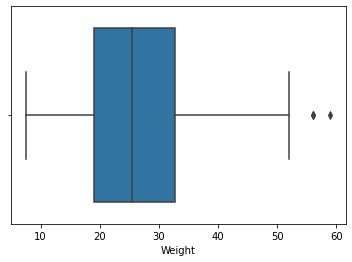

In [16]:
sbr.boxplot(x=df["Weight"])

<AxesSubplot:xlabel='Weight1'>

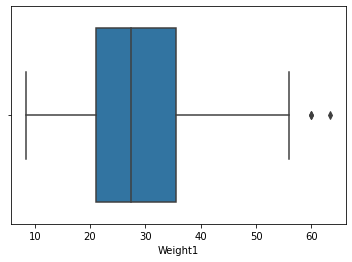

In [17]:
sbr.boxplot(x=df["Weight1"])

<AxesSubplot:xlabel='Length'>

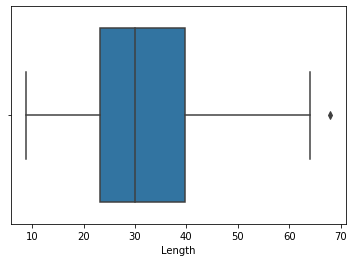

In [18]:
sbr.boxplot(x=df["Length"])

<AxesSubplot:xlabel='Height'>

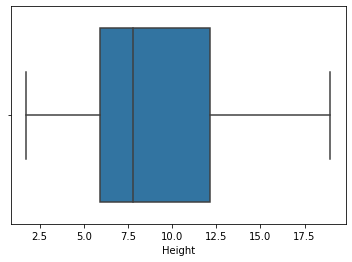

In [19]:
sbr.boxplot(x=df["Height"])

<AxesSubplot:xlabel='Width'>

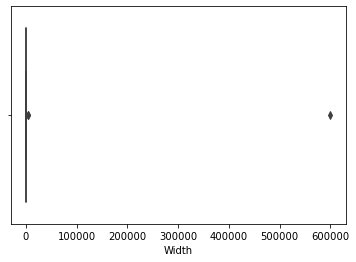

In [20]:
sbr.boxplot(x=df["Width"])

In [21]:
z_scores = stats.zscore(df)

In [22]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [23]:
print(new_df)

      Cost  Weight  Weight1  Length   Height   Width
0    242.0    23.2     25.4    30.0  11.5200  4.0200
1    290.0    24.0     26.3    31.2  12.4800  4.3056
2    340.0    23.9     26.5    31.1  12.3778  4.6961
3    363.0    26.3     29.0    33.5  12.7300  4.4555
4    430.0    26.5     29.0    34.0  12.4440  5.1340
..     ...     ...      ...     ...      ...     ...
154   12.2    11.5     12.2    13.4   2.0904  1.3936
155   13.4    11.7     12.4    13.5   2.4300  1.2690
156   12.2    12.1     13.0    13.8   2.2770  1.2558
157   19.7    13.2     14.3    15.2   2.8728  2.0672
158   19.9    13.8     15.0    16.2   2.9322  1.8792

[156 rows x 6 columns]


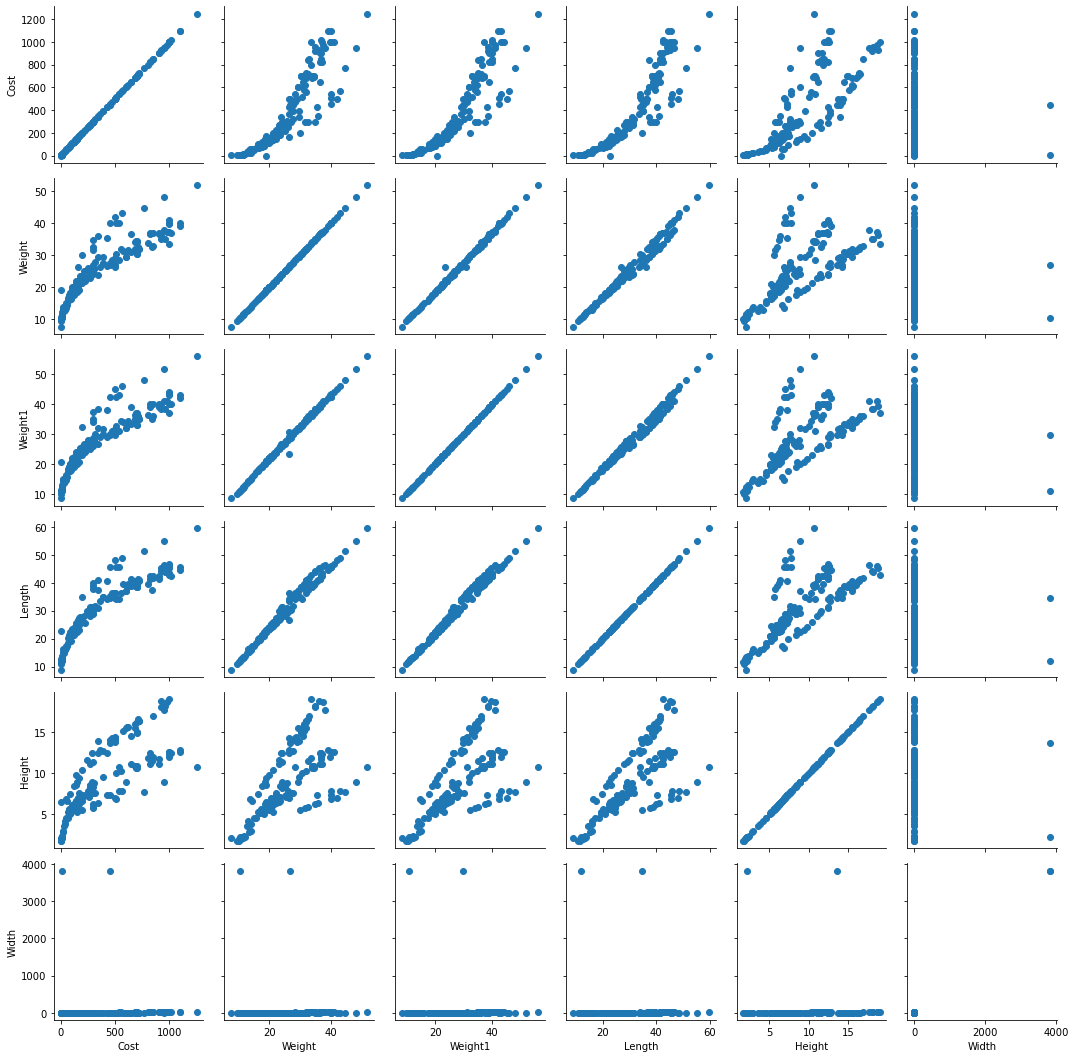

In [26]:
g = sbr.PairGrid(new_df)
g.map(plot.scatter)

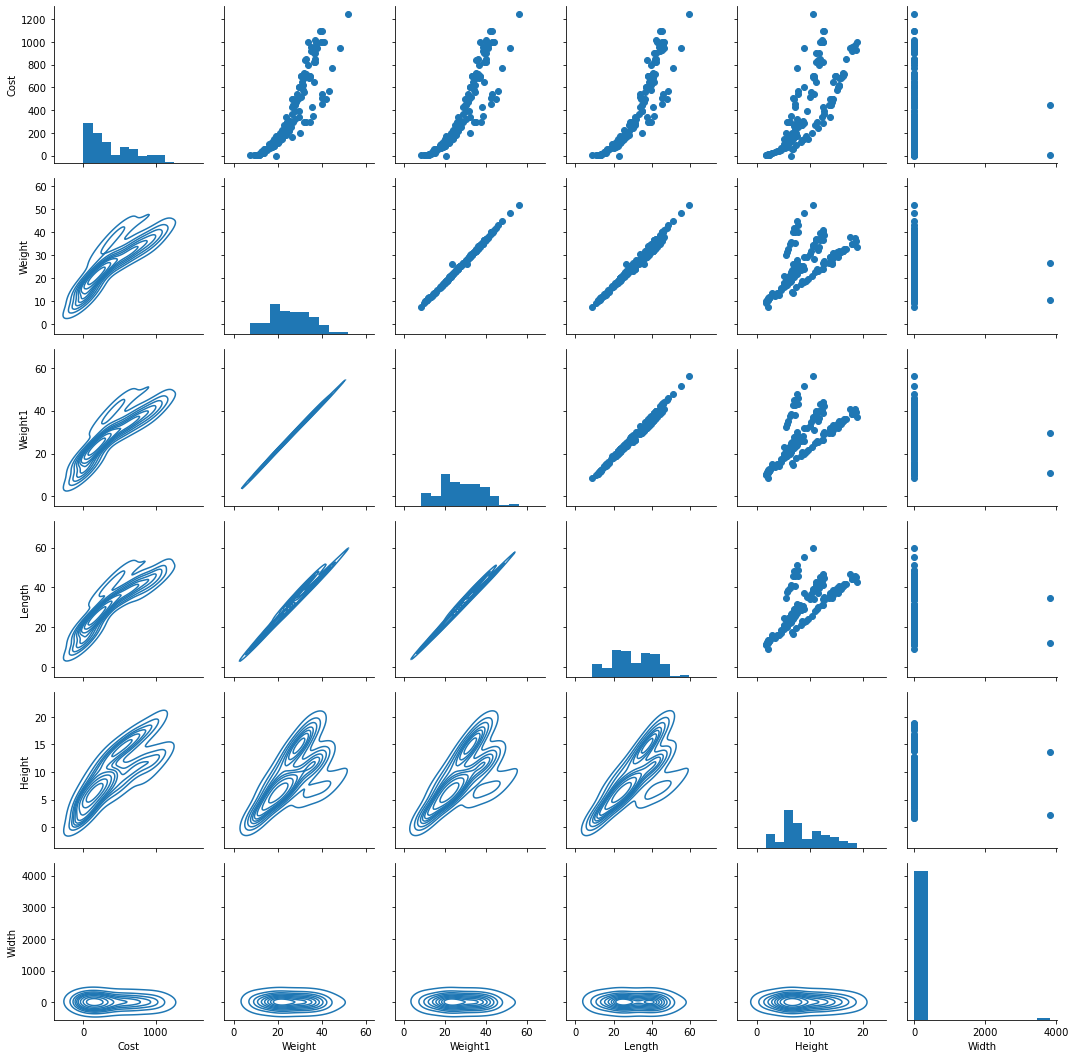

In [27]:
g = sbr.PairGrid(new_df)
g.map_diag(plot.hist)
g.map_upper(plot.scatter)
g.map_lower(sbr.kdeplot)

#### Correlation metrix

In [28]:

corrmat = df.corr()
  
print(corrmat)

             Cost    Weight   Weight1    Length    Height     Width
Cost     1.000000  0.914191  0.918618  0.922746  0.723842  0.267462
Weight   0.914191  1.000000  0.998685  0.990957  0.623891  0.236865
Weight1  0.918618  0.998685  1.000000  0.994001  0.641460  0.234490
Length   0.922746  0.990957  0.994001  1.000000  0.703079  0.224560
Height   0.723842  0.623891  0.641460  0.703079  1.000000  0.012276
Width    0.267462  0.236865  0.234490  0.224560  0.012276  1.000000


#### Feature Selection

In [29]:
cor_target = abs(corrmat["Cost"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Cost       1.000000
Weight     0.914191
Weight1    0.918618
Length     0.922746
Height     0.723842
Name: Cost, dtype: float64

In [30]:
#Correlation with output variable
cor_target = abs(corrmat["Cost"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features
df[['Weight','Weight1','Length','Height']].corr()

,Weight,Weight1,Length,Height
Weight,1.000000,0.998685,0.990957,0.623891
Weight1,0.998685,1.000000,0.994001,0.641460
Length,0.990957,0.994001,1.000000,0.703079
Height,0.623891,0.641460,0.703079,1.000000


###### Forward feature selection

In [94]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
X=new_df[['Weight','Weight1','Length','Height','Width']]

Y = new_df['Cost']
forward_selection(X,Y)

<ipython-input-94-5c572b4179bd>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-94-5c572b4179bd>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-94-5c572b4179bd>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-94-5c572b4179bd>:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


['Length', 'Height', 'Weight1']

In [95]:
X=new_df[['Weight1','Length','Height']]
X = np.c_[new_df['Weight1'],new_df['Length'],new_df['Height']]

In [33]:
print(new_df)

      Cost  Weight  Weight1  Length   Height   Width
0    242.0    23.2     25.4    30.0  11.5200  4.0200
1    290.0    24.0     26.3    31.2  12.4800  4.3056
2    340.0    23.9     26.5    31.1  12.3778  4.6961
3    363.0    26.3     29.0    33.5  12.7300  4.4555
4    430.0    26.5     29.0    34.0  12.4440  5.1340
..     ...     ...      ...     ...      ...     ...
154   12.2    11.5     12.2    13.4   2.0904  1.3936
155   13.4    11.7     12.4    13.5   2.4300  1.2690
156   12.2    12.1     13.0    13.8   2.2770  1.2558
157   19.7    13.2     14.3    15.2   2.8728  2.0672
158   19.9    13.8     15.0    16.2   2.9322  1.8792

[156 rows x 6 columns]


###### Split dataset with Train and Test dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = regressor.predict(X_test)



In [37]:
y_pred

array([ 689.8268255 ,  457.73725408,   66.52921772,  657.47034335,
        689.95427053,  463.63717014,  185.13263029,  411.32277904,
        659.98303279,  144.34676151,  178.59075741,  250.76996427,
        430.76031374,  785.20758496,  219.75695959, -185.1797114 ,
        945.69920389,  783.63906043,  183.21149843,  353.89307791,
       -168.03141305,  512.05631802,  743.85795841,  655.65453473,
        659.21065163, -133.3019793 ,  197.87827905,   59.95780338,
        172.71400278,  188.10770647,  601.35153314,  601.70521063])

In [38]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

9300.070954134118

In [82]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

print('MSE : ',mean_squared_error(Y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 : ',r2_score(Y_test,y_pred))

MSE :  9300.070954134118
RMSE :  96.43687548927598
R2 :  0.9012956057982497


# OLS 

In [98]:
regressor_OLS = sm.OLS(Y_test, exog = X_test).fit()
regressor_OLS.summary()
y_pred = regressor_OLS.predict(X_test)
print('MSE : ',mean_squared_error(Y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 : ',r2_score(Y_test,y_pred))

MSE :  23221.224283269876
RMSE :  152.3851183130094
R2 :  0.753546302301677


## 

# Gradient Descent

###### Split dataset with Train and Test dataset

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)



In [126]:
w1 = 0
w2 = 0
w3 = 0
w0=0
X1= X_train[:,0]
X2= X_train[:,1]
X3= X_train[:,2]
C1=C2=C3=0
c1=c2=c3=0
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X1)) # Number of elements in X

# Performing Gradient Descent 

def GD(X,w0,w1,w2,w3,Y_train):
    X1= X[:,0]
    X2= X[:,1]
    X3= X[:,2]
    for i in range(epochs): 
        Y_pred = w0+w1*X1+w2*X2+w3*X3 # The current predicted value of Y
        D_w1 = (-2/n) * sum(X1 * (Y_train - Y_pred))  # Derivative wrt m
        D_w2 = (-2/n) * sum(X2 * (Y_train - Y_pred))
        D_w3 = (-2/n) * sum(X3 * (Y_train - Y_pred))
        D_w0 = (-2/n) * sum(Y_train - Y_pred)  # Derivative wrt c
        w1 = w1 - L * D_w1  # Update m
        w2 = w2 - L * D_w2
        w1 = w3 - L * D_w3
        w0 = w0 - L * D_w0  # Update c
    
    return (w0,w1,w2,w3)

w0,w1,w2,w3 = GD(X_train,0,0,0,0,Y_train)

print("w0: ",w0)
print("w0: ",w1)
print("w0: ",w2)
print("w0: ",w3)



w0:  -9.618972114874678
w0:  0.030888680480679893
w0:  14.149938225673559
w0:  0


In [128]:
X1= X_train[:,0]
X2= X_train[:,1]
X3= X_train[:,2]

Y_pred = w0+w1*X1+w2*X2+w3*X3

from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,y_pred_1)
print('MSE : ',mean_squared_error(Y_test,y_pred_1))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred_1)))
print('R2 : ',r2_score(Y_test,y_pred_1))

MSE :  38282.93889021151
RMSE :  195.66026395313767
R2 :  0.5936918857870407


# Mini Batch Gradient Descent

In [152]:
w1 = 0
w2 = 0
w3 = 0
w0=0
X1= X_train[:,0]
X2= X_train[:,1]
X3= X_train[:,2]
C1=C2=C3=0
c1=c2=c3=0
L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X1)) # Number of elements in X

# Performing Gradient Descent 

def GD(X,w0,w1,w2,w3,Y_train):
    X1= X[:,0]
    X2= X[:,1]
    X3= X[:,2]
    for i in range(epochs): 
        Y_pred = w0+w1*X1+w2*X2+w3*X3 # The current predicted value of Y
        D_w1 = (-2/n) * sum(X1 * (Y_train - Y_pred))  # Derivative wrt m
        D_w2 = (-2/n) * sum(X2 * (Y_train - Y_pred))
        D_w3 = (-2/n) * sum(X3 * (Y_train - Y_pred))
        D_w0 = (-2/n) * sum(Y_train - Y_pred)  # Derivative wrt c
        w1 = w1 - L * D_w1  # Update m
        w2 = w2 - L * D_w2
        w1 = w3 - L * D_w3
        w0 = w0 - L * D_w0  # Update c
    
    return (w0,w1,w2,w3)

length = len(X_train)
print(length)

batches = length//4
rows, cols = (4, 4)
weight = [[0]*cols]*rows

print(batches)

start=0
end=batches
for i in range(0,3):

    w0,w1,w2,w3= GD(X_train[start:end],0,0,0,0,Y_train[start:end])
    weight[i][0]=w0
    weight[i][1]=w1
    weight[i][2]=w2
    weight[i][3]=w3

    start = start+batches



w0 = weight[0][0]
w1 = weight[0][1]
w2 = weight[0][2]
w3 = weight[0][3]

Y_pred = w0+w1*X1+w2*X2+w3*X3

124
31


In [153]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_predMB2)
from sklearn.metrics import mean_squared_error
print('MSE : ',mean_squared_error(Y_test,y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,y_pred)))
print('R2 : ',r2_score(Y_test,y_pred))

MSE :  23221.224283269876
RMSE :  152.3851183130094
R2 :  0.753546302301677


# Stochastic Gradient Descent

In [122]:

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
clf = SGDRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [123]:
print("Coefficients: \n", clf.coef_)
print("Y_intercept", clf.intercept_)

Coefficients: 
 [-1.99011233e+10 -1.46720967e+09 -4.46638798e+09]
Y_intercept [-1.60490137e+10]


In [124]:
r2_score(Y_test,Y_pred)
print('MSE : ',mean_squared_error(Y_test,Y_pred))
print('RMSE : ',math.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2 : ',r2_score(Y_test,Y_pred))

MSE :  4.958850736355515e+23
RMSE :  704191077503.5079
R2 :  -5.262974446999208e+18


# Observation and Conclusion

According to RMSE, MSE and R2, Mini Batch GD and OLS model are good fit for this data 